# Sales Predictive Models

### Description

###### Evaluate deals created from 07/01/2017 through 12/31/2019 to determine if a deal will be 'Won' or 'Lost' based on wide range of features created. 30% of data set will be randomally set aside for testing while 70% will be used to train the models.

Time period used to train/test model:  07/01/2017 to 12/31/2019
Time period used to test predictive model: 01/01/2020 to 03/31/2020

If predictive model has strong accuracy (over 90%) will be deployed to full production

In [5]:
# Set Dark Mode
#from jupyterthemes import get_themes
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme

#set_nb_theme("onedork")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; 
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [11]:
# open data and assign to data frame
deal_df = pd.read_excel("training_q4_fy20.xls")

FileNotFoundError: [Errno 2] No such file or directory: 'training_q4_fy20.xls'

In [390]:
# sets global parameters to show all columns for .head function
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [391]:
deal_df.head()

,sfdc_opportunity_id,created_date,close_date,simple_stage,big_deal_flag,shopping_date,created_beg_of_qtr,created_end_of_qtr,shop_beg_of_qtr,shop_end_of_qtr,closed_beg_of_qtr,closed_end_of_qtr,product_count,campaign_influence_count,total_opp_roles,exec_sponsor,champion,decision_maker,economic_decision_maker,econ_buyer,influencer,technical_buyer,subject_matter_expert,evaluator,business_user,detractor,exec_sponsor_flag,champion_flag,decision_maker_flag,economic_decision_maker_flag,econ_buyer_flag,influencer_flag,technical_buyer_flag,subject_matter_expert_flag,evaluator_flag,business_user_flag,detractor_flag,closedate_push_count,prefunnel_date,qualify_date,verify_date,position_date,propose_date,selected_date,days_created_from_qtr_beg,days_created_from_qtr_end,days_shop_from_qtr_beg,days_shop_from_qtr_end,create_to_shop,shop_to_close,create_to_prefunnel,create_to_qualify,create_to_verify,create_to_position,create_to_propose,create_to_selected,create_to_close,prefunnel_to_qualify,prefunnel_to_verify,prefunnel_to_position,prefunnel_to_propose,prefunnel_to_selected,prefunnel_to_close,qualify_to_verify,qualify_to_position,qualify_to_propose,qualify_to_selected,qualify_to_close,verify_to_position,verify_to_propose,verify_to_selected,verify_to_close,position_to_propose,position_to_selected,position_to_close,propose_to_selected,propose_to_close,selected_to_close,prefunnel_count,qualify_count,position_count,verify_count,propose_count,selected_count,total_stage_count,cycle_per_stage,forward_total_count,backward_total_count,nochange_total_count,exp_outcome
0,0065000000fJWet,2017-03-06,2017-12-11,Won,0,2017-06-12,2017-01-01,2017-03-31,2017-04-01,2017-06-30,2017-10-01,2017-12-31,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,8.0,NaT,2017-04-07,2017-05-31,2017-06-12,2017-07-28,2017-09-14,64,25,72,18,98,182,0,32,86,98,144,192,280,0,0,0,0,0,0,54,66,112,160,248,12,58,106,194,48.0,48.0,48.0,48,136,88,0,1,1,1,1,1,5,56,6.0,6.0,6.0,1
1,0065000000e6Cej,2016-11-16,2018-03-30,Lost,0,2018-02-23,2016-10-01,2016-12-31,2018-01-01,2018-03-31,2018-01-01,2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,14.0,NaT,2016-11-18,2018-01-22,2018-03-16,2017-06-30,2018-03-29,46,45,53,36,464,35,0,2,432,485,226,498,499,0,0,0,0,0,0,430,483,224,496,497,53,-206,66,67,272.0,272.0,272.0,272,273,1,0,1,1,1,1,1,5,99,6.0,6.0,6.0,0
2,0062J00000nbWuk,2019-07-01,2020-04-01,Lost,1,NaT,2019-07-01,2019-09-30,NaT,NaT,2020-04-01,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaT,2019-08-01,NaT,NaT,NaT,NaT,0,91,0,0,0,0,0,31,0,0,0,0,275,0,0,0,0,0,0,0,0,0,0,244,0,0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,275,2.0,2.0,2.0,0
3,0065000000hFyip,2017-09-07,2017-12-22,Won,0,2017-09-12,2017-07-01,2017-09-30,2017-07-01,2017-09-30,2017-10-01,2017-12-31,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,3.0,NaT,NaT,NaT,2017-09-20,NaT,2017-12-20,68,23,73,18,5,101,0,0,0,13,0,104,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0,0,2,0,0,1,0,0,1,2,53,3.0,3.0,3.0,1
4,0065000000m2hdW,2018-10-16,2018-12-31,Lost,0,NaT,2018-10-01,2018-12-31,NaT,NaT,2018-10-01,2018-12-31,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaT,NaT,NaT,NaT,NaT,NaT,15,76,0,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0


### Check for outliers and missing values

In [392]:
deal_df.describe()

,big_deal_flag,product_count,campaign_influence_count,total_opp_roles,exec_sponsor,champion,decision_maker,economic_decision_maker,econ_buyer,influencer,technical_buyer,subject_matter_expert,evaluator,business_user,detractor,exec_sponsor_flag,champion_flag,decision_maker_flag,economic_decision_maker_flag,econ_buyer_flag,influencer_flag,technical_buyer_flag,subject_matter_expert_flag,evaluator_flag,business_user_flag,detractor_flag,closedate_push_count,days_created_from_qtr_beg,days_created_from_qtr_end,days_shop_from_qtr_beg,days_shop_from_qtr_end,create_to_shop,shop_to_close,create_to_prefunnel,create_to_qualify,create_to_verify,create_to_position,create_to_propose,create_to_selected,create_to_close,prefunnel_to_qualify,prefunnel_to_verify,prefunnel_to_position,prefunnel_to_propose,prefunnel_to_selected,prefunnel_to_close,qualify_to_verify,qualify_to_position,qualify_to_propose,qualify_to_selected,qualify_to_close,verify_to_position,verify_to_propose,verify_to_selected,verify_to_close,position_to_propose,position_to_selected,position_to_close,propose_to_selected,propose_to_close,selected_to_close,prefunnel_count,qualify_count,position_count,verify_count,propose_count,selected_count,total_stage_count,cycle_per_stage,forward_total_count,backward_total_count,nochange_total_count,exp_outcome
count,2784.000000,2011.000000,1940.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.0,928.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.0,2784.000000,2291.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2710.000000,2655.000000,2280.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2780.000000,2780.000000,2780.000000,2784.000000
mean,0.058908,1.170562,1.833505,2.174569,0.043103,0.814655,0.009698,0.003233,0.870690,0.404095,0.015086,0.050647,0.003233,0.0,0.003233,0.012931,0.231322,0.003233,0.001078,0.231681,0.090876,0.005029,0.011853,0.001078,0.0,0.001078,4.887822,51.429598,38.841236,20.972701,16.245690,83.532687,86.168463,80.745330,91.842672,45.248922,60.491739,35.978807,44.447198,401.636494,-1.366739,-0.335848,3.567888,5.006825,7.631106,95.735632,0.139727,10.230244,12.040230,17.878233,141.807471,7.586925,5.982399,9.286997,56.692529,1.967528,2.008286,2.338596,2.774425,11.890086,6.084411,0.234914,0.438937,0.220546,0.184986,0.117098,0.149066,1.345546,192.887213,2.353597,2.353597,2.353597,0.188578
std,0.235495,0.623143,1.780825,1.355686,0.223428,0.655341,0.098054,0.056796,0.727398,0.800124,0.121962,0.309190,0.056796,0.0,0.056796,0.112997,0.421753,0.056776,0.032815,0.421982,0.287485,0.070748,0.108246,0.032815,0.0,0.032815,4.203563,25.193653,25.244530,29.824266,25.310689,220.914350,218.042554,214.250281,227.799353,158.305282,189.601350,151.364649,163.805909,381.932898,113.826340,86.331429,94.884470,60.709622,66.143194,225.608392,95.183645,96.357166,75.577555,80.515099,231.588876,67.285649,52.307798,56.344111,172.064786,21.678744,21.900352,23.617218,23.664944,67.853651,43.996273,0.424021,0.496346,0.414689,0.388356,0.321594,0.356218,1.376303,268.643363,1.384567,1.384567,1.384567,0.391243
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-764.000000,-365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-530.000000,-753.000000,-1431.000000,-1414.000000,-686.000000,-257.000000,-97.000000,-1232.000000,-12

### % of Features with Negative Values as % of Total Opportunities

In [40]:
# % of negative shop_to_close opporunities

prefunnel_to_close_neg = format(deal_df.loc[deal_df['prefunnel_to_validation']<0, 'sfdc_opportunity_id'].count()/deal_df['prefunnel_to_close'].count()*100, '.2f')
prefunnel_to_close_text = "Prefunnel to Validation: {}%"
print(prefunnel_to_close_text.format(prefunnel_to_close_neg))

prefunnel_to_proposal_neg = format(deal_df.loc[deal_df['prefunnel_to_proposal']<0, 'sfdc_opportunity_id'].count()/deal_df['prefunnel_to_proposal'].count()*100, '.2f')
prefunnel_to_proposal_text = "Prefunnel to Proposal: {}%"
print(prefunnel_to_close_text.format(prefunnel_to_close_neg))

shop_to_close_neg = format(deal_df.loc[deal_df['shop_to_close']<0, 'sfdc_opportunity_id'].count()/deal_df['shop_to_close'].count()*100, '.2f')
shop_to_close_text = "Shop to Close: {}%"
print(shop_to_close_text.format(shop_to_close_neg))

create_to_close_neg = format(deal_df.loc[deal_df['create_to_close']<0, 'sfdc_opportunity_id'].count()/deal_df['create_to_close'].count()*100, '.2f')
create_to_close_text = "Create to Close: {}%"
print(create_to_close_text.format(create_to_close_neg))

qualification_to_validation_neg = format(deal_df.loc[deal_df['qualification_to_validation']<0, 'sfdc_opportunity_id'].count()/deal_df['qualification_to_validation'].count()*100, '.2f')
qualification_to_validation_text = "Qualify to Verify: {}%"
print(qualification_to_validation_text.format(qualification_to_validation_neg))

qualification_to_proposal_neg = format(deal_df.loc[deal_df['qualification_to_proposal']<0, 'sfdc_opportunity_id'].count()/deal_df['qualification_to_proposal'].count()*100, '.2f')
qualification_to_proposal_text = "Qualification to Proposal: {}%"
print(qualification_to_proposal_text.format(qualification_to_proposal_neg))

qualification_to_selected_neg = format(deal_df.loc[deal_df['qualification_to_selected']<0, 'sfdc_opportunity_id'].count()/deal_df['qualification_to_selected'].count()*100, '.2f')
qualification_to_selected_text = "Qualification to Selected: {}%"
print(qualification_to_selected_text.format(qualification_to_selected_neg))


qualification_to_close_neg = format(deal_df.loc[deal_df['qualification_to_close']<0, 'sfdc_opportunity_id'].count()/deal_df['qualification_to_close'].count()*100, '.2f')
qualification_to_close_text = "Qualification to Close: {}%"
print(qualification_to_close_text.format(qualification_to_close_neg))


validation_to_proposal_neg = format(deal_df.loc[deal_df['validation_to_proposal']<0, 'sfdc_opportunity_id'].count()/deal_df['validation_to_proposal'].count()*100, '.2f')
validation_to_proposal_text = "Validation to Proposal: {}%"
print(validation_to_proposal_text.format(validation_to_proposal_neg))


validation_to_selected_neg = format(deal_df.loc[deal_df['validation_to_selected']<0, 'sfdc_opportunity_id'].count()/deal_df['validation_to_selected'].count()*100, '.2f')
validation_to_selected_text = "Verify to Solution: {}%"
print(validation_to_selected_text.format(validation_to_selected_neg))

proposal_to_selected_neg = format(deal_df.loc[deal_df['proposal_to_selected']<0, 'sfdc_opportunity_id'].count()/deal_df['proposal_to_selected'].count()*100, '.2f')
proposal_to_selected_text = "Proposal to Selected: {}%"
print(proposal_to_selected_text.format(proposal_to_selected_neg))

proposal_to_close_neg = format(deal_df.loc[deal_df['proposal_to_close']<0, 'sfdc_opportunity_id'].count()/deal_df['proposal_to_close'].count()*100, '.2f')
proposal_to_close_text = "Proposal to Close: {}%"
print(proposal_to_close_text.format(proposal_to_close_neg))

selected_to_close_neg = format(deal_df.loc[deal_df['selected_to_close']<0, 'sfdc_opportunity_id'].count()/deal_df['selected_to_close'].count()*100, '.2f')
selected_to_close_text = "Selected to Close: {}%"
print(selected_to_close_text.format(selected_to_close_neg))

Prefunnel to Validation: 3.54%
Prefunnel to Validation: 3.54%
Shop to Close: 0.34%
Create to Close: 1.70%
Qualify to Verify: 4.27%
Qualification to Proposal: 3.78%
Qualification to Selected: 0.10%
Qualification to Close: 0.10%
Validation to Proposal: 2.04%
Verify to Solution: 0.10%
Proposal to Selected: 0.63%
Proposal to Close: 0.15%
Selected to Close: 0.29%


# Clean and Transform the Data

In [626]:
# Handle Missing Data or 0 that shouldn't be 0s
# if convert to NAN they wont be used in mean or any calculations BUT cant use for machine learning BUT 
# BUT can impute all NAN values and replace those values wit mean +- std

# Impute missing values
# **********  only transform to np.nan if you are going to impute, scikit-learn will give an error if nans are present
# assigns variables to mask that are equal to 0 but 0 value is either missing data or outlier that needs to be dealt with

#mask = dc_df[['stage_duration']] == 0

# Transforms all variables in mask as NAN
#dc_df[mask] = np.nan

 
# OR
# Drop rows that contain NANs/0s
# funnel_data.dropna(axis=0, how='any')    # returns a new DataFrame dropping the rows containing 'any' nans

In [14]:
deal_df.head()

,sfdc_opportunity_id,created_date,close_date,simple_stage,big_deal_flag,shopping_date,created_beg_of_qtr,created_end_of_qtr,shop_beg_of_qtr,shop_end_of_qtr,closed_beg_of_qtr,closed_end_of_qtr,product_count,campaign_influence_count,total_opp_roles,exec_sponsor,champion,decision_maker,economic_decision_maker,econ_buyer,influencer,technical_buyer,subject_matter_expert,evaluator,business_user,detractor,exec_sponsor_flag,champion_flag,decision_maker_flag,economic_decision_maker_flag,econ_buyer_flag,influencer_flag,technical_buyer_flag,subject_matter_expert_flag,evaluator_flag,business_user_flag,detractor_flag,closedate_push_count,prefunnel_date,qualify_date,verify_date,position_date,propose_date,selected_date,days_created_from_qtr_beg,days_created_from_qtr_end,days_shop_from_qtr_beg,days_shop_from_qtr_end,create_to_shop,shop_to_close,create_to_prefunnel,create_to_qualify,create_to_verify,create_to_position,create_to_propose,create_to_selected,create_to_close,prefunnel_to_qualify,prefunnel_to_verify,prefunnel_to_position,prefunnel_to_propose,prefunnel_to_selected,prefunnel_to_close,qualify_to_verify,qualify_to_position,qualify_to_propose,qualify_to_selected,qualify_to_close,verify_to_position,verify_to_propose,verify_to_selected,verify_to_close,position_to_propose,position_to_selected,position_to_close,propose_to_selected,propose_to_close,selected_to_close,prefunnel_count,qualify_count,position_count,verify_count,propose_count,selected_count,total_stage_count,cycle_per_stage,forward_total_count,backward_total_count,nochange_total_count,exp_outcome
0,0065000000fJWet,2017-03-06,2017-12-11,Won,0,2017-06-12,2017-01-01,2017-03-31,2017-04-01,2017-06-30,2017-10-01,2017-12-31,1.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,8.0,NaT,2017-04-07,2017-05-31,2017-06-12,2017-07-28,2017-09-14,64,25,72,18,98,182,0,32,86,98,144,192,280,0,0,0,0,0,0,54,66,112,160,248,12,58,106,194,48.0,48.0,48.0,48,136,88,0,1,1,1,1,1,5,56,6.0,6.0,6.0,1
1,0065000000e6Cej,2016-11-16,2018-03-30,Lost,0,2018-02-23,2016-10-01,2016-12-31,2018-01-01,2018-03-31,2018-01-01,2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,14.0,NaT,2016-11-18,2018-01-22,2018-03-16,2017-06-30,2018-03-29,46,45,53,36,464,35,0,2,432,485,226,498,499,0,0,0,0,0,0,430,483,224,496,497,53,-206,66,67,272.0,272.0,272.0,272,273,1,0,1,1,1,1,1,5,99,6.0,6.0,6.0,0
2,0062J00000nbWuk,2019-07-01,2020-04-01,Lost,1,NaT,2019-07-01,2019-09-30,NaT,NaT,2020-04-01,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaT,2019-08-01,NaT,NaT,NaT,NaT,0,91,0,0,0,0,0,31,0,0,0,0,275,0,0,0,0,0,0,0,0,0,0,244,0,0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,275,2.0,2.0,2.0,0
3,0065000000hFyip,2017-09-07,2017-12-22,Won,0,2017-09-12,2017-07-01,2017-09-30,2017-07-01,2017-09-30,2017-10-01,2017-12-31,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,3.0,NaT,NaT,NaT,2017-09-20,NaT,2017-12-20,68,23,73,18,5,101,0,0,0,13,0,104,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,0,0,2,0,0,1,0,0,1,2,53,3.0,3.0,3.0,1
4,0065000000m2hdW,2018-10-16,2018-12-31,Lost,0,NaT,2018-10-01,2018-12-31,NaT,NaT,2018-10-01,2018-12-31,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaT,NaT,NaT,NaT,NaT,NaT,15,76,0,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0


### Drop ID and Date Columns

In [393]:
# dropped all ID columns
#deal_df=deal_df.drop(['sfdc_opportunity_id', 'simple_stage','created_date', 'close_date','prefunnel_date','shopping_date','qualification_date','validation_date','proposal_date','selected_date','created_beg_of_qtr','created_end_of_qtr','shop_end_of_qtr','closed_beg_of_qtr','shop_beg_of_qtr','closed_end_of_qtr'], axis=1)

# drops forward/backward/no_change counts since produce NANs
#deal_df=deal_df.drop(['sfdc_opportunity_id', 'simple_stage','created_date', 'close_date','prefunnel_date','shopping_date','qualification_date','validation_date','proposal_date','selected_date','created_beg_of_qtr','created_end_of_qtr','shop_end_of_qtr','closed_beg_of_qtr','shop_beg_of_qtr','closed_end_of_qtr','backward_total_count','forward_total_count','nochange_total_count'], axis=1)
#deal_df = deal_df[['selected_count','create_to_selected','create_to_shop','shop_to_close', 'days_shop_from_qtr_beg','days_shop_from_qtr_end','create_to_proposal','create_to_close','cycle_per_stage','total_stage_count', 'exp_outcome']]

# assign top variables
deal_df = deal_df[['selected_count','create_to_selected','create_to_propose','create_to_shop','create_to_close','shop_to_close', 'days_shop_from_qtr_beg','days_shop_from_qtr_end','days_created_from_qtr_beg','cycle_per_stage', 'exp_outcome']]

deal_df.head()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
0,1,192,144,98,280,182,72,18,64,56,1
1,1,498,226,464,499,35,53,36,46,99,0
2,0,0,0,0,275,0,0,0,0,275,0
3,1,104,0,5,106,101,73,18,68,53,1
4,0,0,0,0,76,0,0,0,15,0,0


In [394]:
deal_df.describe()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.149066,44.447198,35.978807,83.532687,401.636494,86.168463,20.972701,16.245690,51.429598,192.887213,0.188578
std,0.356218,163.805909,151.364649,220.914350,381.932898,218.042554,29.824266,25.310689,25.193653,268.643363,0.391243
min,0.000000,0.000000,0.000000,-764.000000,-530.000000,-365.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,288.000000,0.000000,0.000000,0.000000,59.000000,87.000000,0.000000
75%,0.000000,0.000000,0.000000,27.000000,564.250000,58.250000,43.000000,25.000000,72.000000,285.000000,0.000000
max,1.000000,1779.000000,2220.000000,2100.000000,3505.000000,1848.000000,91.000000,91.000000,91.000000,2655.000000,1.000000


In [395]:
# replace all NANs with 0
deal_df = deal_df.fillna(0)


In [396]:
deal_df.describe()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.149066,44.447198,35.978807,83.532687,401.636494,86.168463,20.972701,16.245690,51.429598,192.887213,0.188578
std,0.356218,163.805909,151.364649,220.914350,381.932898,218.042554,29.824266,25.310689,25.193653,268.643363,0.391243
min,0.000000,0.000000,0.000000,-764.000000,-530.000000,-365.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,288.000000,0.000000,0.000000,0.000000,59.000000,87.000000,0.000000
75%,0.000000,0.000000,0.000000,27.000000,564.250000,58.250000,43.000000,25.000000,72.000000,285.000000,0.000000
max,1.000000,1779.000000,2220.000000,2100.000000,3505.000000,1848.000000,91.000000,91.000000,91.000000,2655.000000,1.000000


In [28]:
deal_df.head()

,big_deal_flag,product_count,campaign_influence_count,total_opp_roles,exec_sponsor,champion,decision_maker,economic_decision_maker,econ_buyer,influencer,technical_buyer,subject_matter_expert,evaluator,business_user,detractor,exec_sponsor_flag,champion_flag,decision_maker_flag,economic_decision_maker_flag,econ_buyer_flag,influencer_flag,technical_buyer_flag,subject_matter_expert_flag,evaluator_flag,business_user_flag,detractor_flag,closedate_push_count,days_created_from_qtr_beg,days_created_from_qtr_end,days_shop_from_qtr_beg,days_shop_from_qtr_end,create_to_shop,shop_to_close,create_to_prefunnel,create_to_qualification,create_to_validation,create_to_proposal,create_to_selected,create_to_close,prefunnel_to_qualification,prefunnel_to_validation,prefunnel_to_proposal,prefunnel_to_selected,prefunnel_to_close,qualification_to_validation,qualification_to_proposal,qualification_to_selected,qualification_to_close,validation_to_proposal,validation_to_selected,validation_to_close,proposal_to_selected,proposal_to_close,selected_to_close,prefunnel_count,qualification_count,validation_count,proposal_count,selected_count,total_stage_count,cycle_per_stage,forward_total_count,backward_total_count,nochange_total_count,exp_outcome
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,5.0,11,78,20,71,190,0,190,0,0,0,0,190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,190,2.0,2.0,2.0,1
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,3.0,38,53,0,0,0,0,0,0,0,0,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,6.0,12,79,0,0,0,0,0,0,0,0,250,453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,203,0,0,0,0,1,1,453,3.0,3.0,3.0,0
3,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,6.0,54,37,55,36,1,242,26,0,69,0,0,243,0,43,0,0,217,0,0,0,0,0,0,174,0,0,0,1,0,1,0,0,2,121,4.0,4.0,4.0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1.0,29,62,0,0,0,0,0,0,0,0,0,309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,309,0,0,0,0,1,1,309,2.0,2.0,2.0,0


### Archive the cleaned and transforned DataFrame (if desired)

In [15]:
# saves cleaned and transformed data set prior to modeling
deal_df.to_csv("deal__cleaned_trasnormed_final.csv")

# Visualize the data
Note which are numerical and which are categorical.

### Correlation Plots

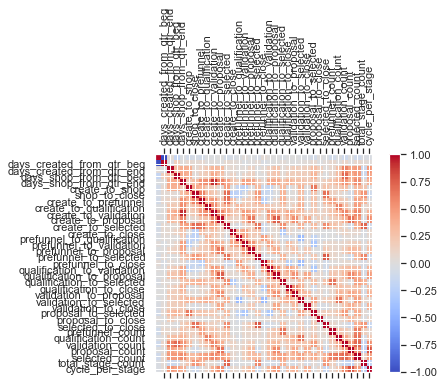

In [631]:
# Correlation Plot of all variables
corr = deal_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(1,len(deal_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(deal_df.columns)
ax.set_yticklabels(deal_df.columns)
plt.show()

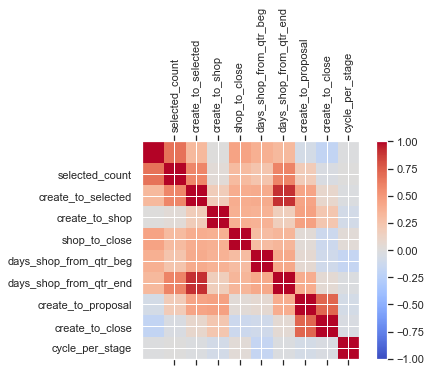

In [633]:
# Correlation Plot of 15 top variables
columns = ['selected_count','create_to_selected','create_to_shop','shop_to_close', 'days_shop_from_qtr_beg','days_shop_from_qtr_end','create_to_proposal','create_to_close','cycle_per_stage','days_created_from_qtr_beg']
corr = deal_df[columns].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(1,len(columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(deal_df[columns].columns)
ax.set_yticklabels(deal_df[columns].columns)
plt.show()

### Pairplots

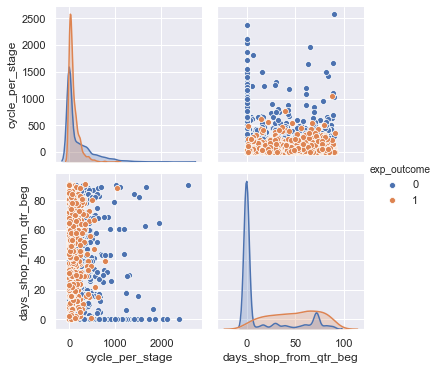

In [29]:
pair_plot = sns.pairplot(deal_df, vars=['cycle_per_stage', 'days_shop_from_qtr_beg'], hue='exp_outcome')

In [67]:
# creates pairplot that changes markers of plots for different categories
#pair_plot = sns.pairplot(deal_df, vars=['cycle_per_stage','days_shop_from_qtr_beg'], hue="exp_outcome", markers=["s","D"])

In [68]:
# creates diagnol plot with distirbution
#pair_plot = sns.pairplot(deal_df, vars=['exp_outcome', 'cycle_per_stage', 'verbal_count'],diag_kind="kde")

In [69]:
# creates pairplot with regression. each joint plot shows regressiona nd confidence interval
#pair_plot = sns.pairplot(deal_df, vars = ['cycle_per_stage','days_shop_from_qtr_end'],diag_kind="reg")

In [70]:
# creates pairplot with regression. each joint plot shows regression and confidence interval for different combinations
#pair_plot = sns.pairplot(deal_df, kind='reg', vars = ['cycle_per_stage','days_shop_from_qtr_end'], hue='exp_outcome', diag_kind="reg")

### Density Plots

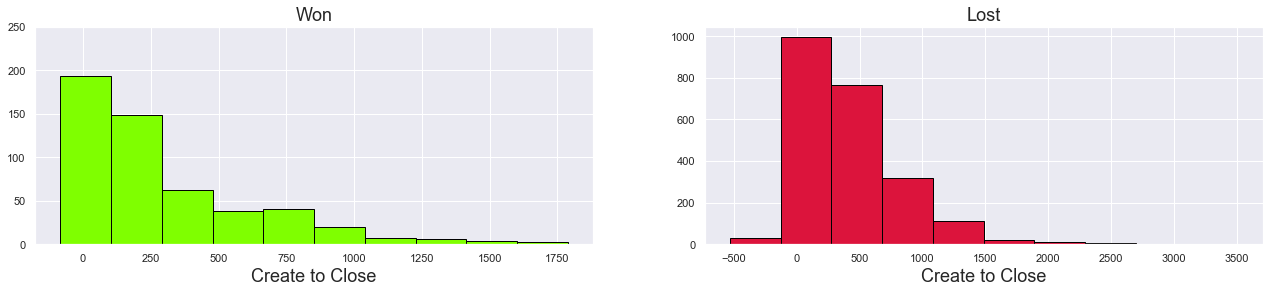

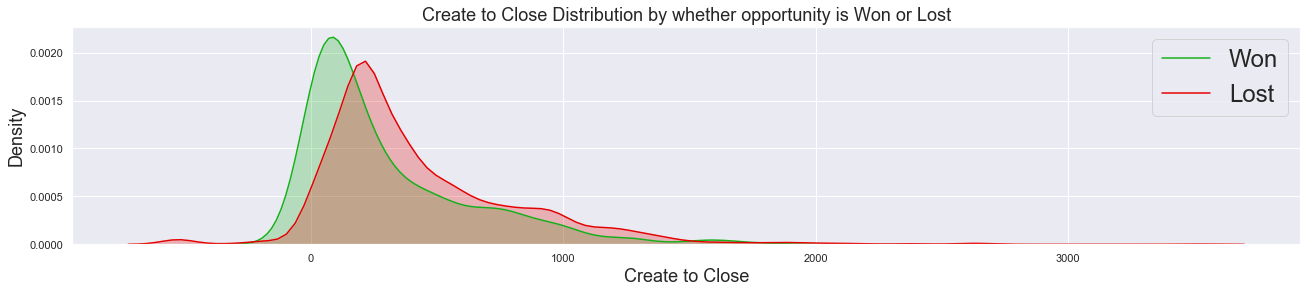

In [30]:
# Days to Close Density Plot
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(deal_df.loc[deal_df['exp_outcome'] == 1, "create_to_close"], color = 'chartreuse', edgecolor='black')
ax[0].set_title('Won', fontsize = 18) 
ax[0].set_xlabel('Create to Close', fontsize = 18)

ax[0].set_ylim(0,250)
ax[1].hist(deal_df.loc[deal_df['exp_outcome'] == 0, "create_to_close"], color = 'crimson', edgecolor='black')
ax[1].set_title('Lost', fontsize = 18)
ax[1].set_xlabel('Create to Close', fontsize = 18)


# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(deal_df.loc[deal_df['exp_outcome'] == 1, "create_to_close"], shade=True, color=sns.xkcd_rgb["green"], label="Won")
ax = sns.kdeplot(deal_df.loc[deal_df['exp_outcome'] == 0, "create_to_close"], shade=True, color=sns.xkcd_rgb["red"], label="Lost")
ax.set_title('Create to Close Distribution by whether opportunity is Won or Lost', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Create to Close', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

### Violinplots

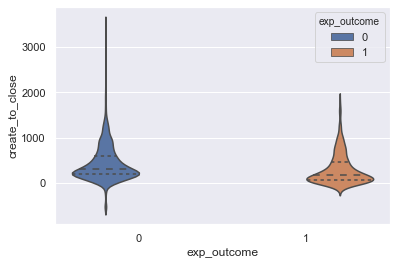

In [31]:
# create_to_close violionplot

sns.violinplot(x='exp_outcome',y='create_to_close', hue='exp_outcome', data=deal_df, inner='quartile');
plt.show()

### Histograms
Plot All Variables To See Relationships

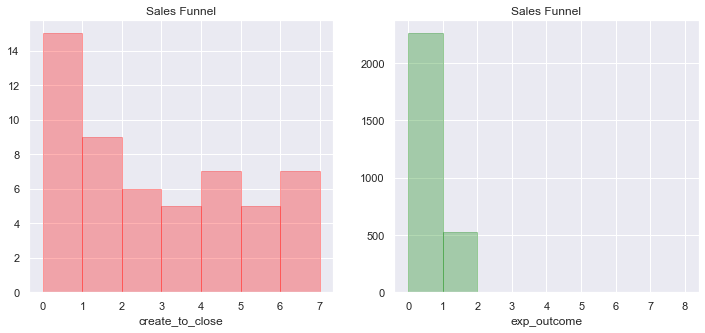

In [32]:

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(deal_df['create_to_close'],  alpha=.3, color = 'red', edgecolor='red', bins=[0,1,2,3,4,5,6,7])
ax[0].set(title="Sales Funnel", xlabel='create_to_close')
ax[1].hist(deal_df.loc[deal_df.exp_outcome.notnull(),'exp_outcome'],  alpha=.3, color = 'green', edgecolor='green', bins=[0,1,2,3,4,5,6,7,8])
ax[1].set(title="Sales Funnel", xlabel='exp_outcome')
plt.show()


# Principal Componenet Analysis (PCA)


Difficult to visualize high dimensional data, we can use PCA to find the # of principal components that explain 90% of the variance, and visualize the data in this new, two-dimensional space, with a single scatter-plot.

In [603]:
# assign target to 

target = deal_df['exp_outcome']
target_name = 'exp_outcome'

data = deal_df.iloc[:, :-1].values

feature_names = deal_df.iloc[:,:-1].columns


In [604]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

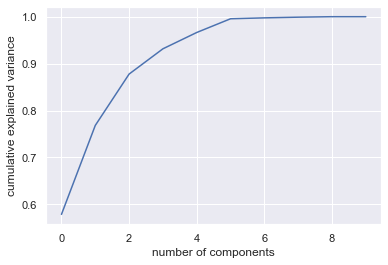

In [605]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [676]:
from sklearn.decomposition import PCA

n_components = 7
pca = PCA(0.90)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [677]:
scaled_data.shape

(2784, 10)

In [678]:
x_pca.shape

(2784, 7)

PCA reduced 10 features down to 2 components

Text(0, 0.5, 'Second Principal Component')

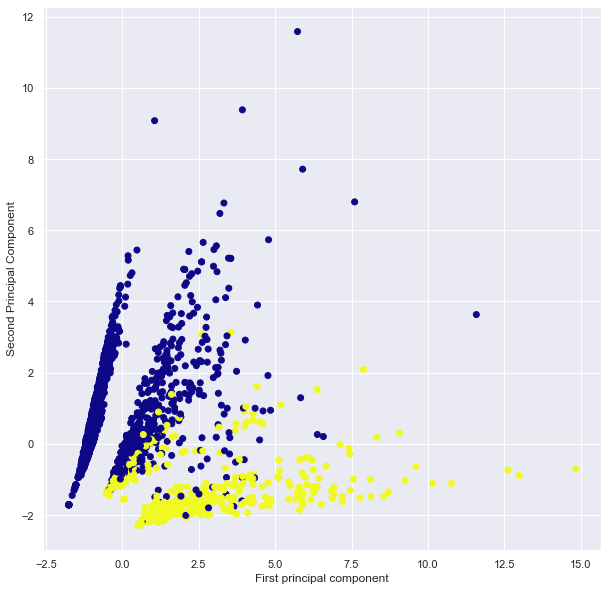

In [679]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [619]:
print("{} PCAs explain {}% of all data variability".format(n_components,format(pca.explained_variance_ratio_.sum()*100, '.2f')))

7 PCAs explain 92.72% of all data variability


In [ ]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing


data_scaled = pd.DataFrame(preprocessing.scale(deal_df.iloc[:, :-1]),columns = deal_df.iloc[:, :-1].columns) 

# PCA
pca = PCA(n_components=7)
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)

# Dump components relations with features:
pd.DataFrame(pca.components_, columns = data_scaled.columns, index = ['PC-1','PC-2'])

In [172]:
deal_df_comp = pd.DataFrame(pca.components_, columns = data_scaled.columns)

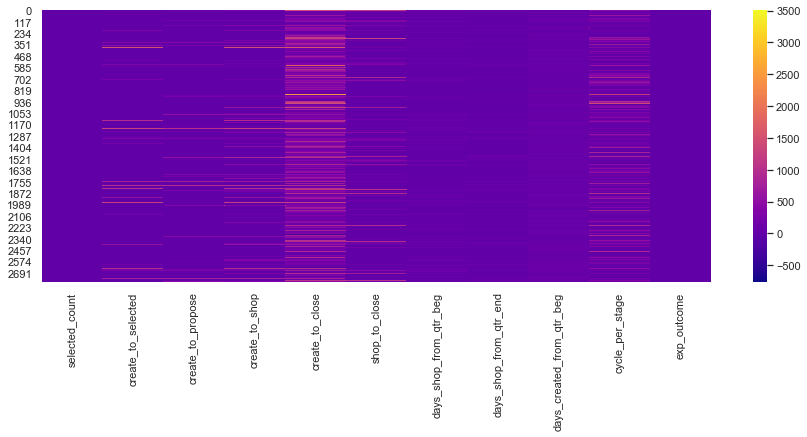

In [173]:
plt.figure(figsize=(15,5))
sns.heatmap(deal_df,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

### Assign independent variables to X and target variable to y

In [34]:
deal_df.head()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
0,1,192,144,98,280,182,72,18,64,56,1
1,1,498,226,464,499,35,53,36,46,99,0
2,0,0,0,0,275,0,0,0,0,275,0
3,1,104,0,5,106,101,73,18,68,53,1
4,0,0,0,0,76,0,0,0,15,0,0


In [681]:
# Get X and y

#X = funnel_data[['create_to_shop', 'shop_to_close']].values
#y = funnel_data['exp_outcome'].values

# OR if target variable is at the end
X = deal_df.iloc[:, :-1].values
y = deal_df.iloc[:, -1].values

In [682]:
X[:64]

array([[   1,  192,  144,   98,  280,  182,   72,   18,   64,   56],
       [   1,  498,  226,  464,  499,   35,   53,   36,   46,   99],
       [   0,    0,    0,    0,  275,    0,    0,    0,    0,  275],
       [   1,  104,    0,    5,  106,  101,   73,   18,   68,   53],
       [   0,    0,    0,    0,   76,    0,    0,    0,   15,    0],
       [   0,    0,    0,    0,  560,    0,    0,    0,   25,  280],
       [   0,    0,    0,    0, 1197,    0,    0,    0,   75,    0],
       [   0,    0,    0,  224, 1364, 1140,   44,   46,    2,  454],
       [   0,    0,    0,    0,  225,    0,    0,    0,   58,  225],
       [   0,    0,    0,    0,  909,    0,    0,    0,   67,  909],
       [   0,    0,    0,    0, 1175,    0,    0,    0,   44,  587],
       [   0,    0,    0,    0,    0,    0,    0,    0,   66,    0],
       [   0,    0,    0,   53,  847,  794,   60,   30,    7,  211],
       [   0,    0,    0,    0, 1003,    0,    0,    0,   89,  501],
       [   0,    0,    0,    0,  2

In [683]:
#y.ravel() flattens if 2 dimensional
y

array([1, 0, 0, ..., 1, 0, 1])

In [684]:
X.shape

(2784, 10)

In [685]:
y.shape

(2784,)

### Split and Standardize the Data

In [686]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# split dataset into test/train  using All features
# random_state assigns equal shuffle to all values when splitting train/test
# stratify when have inbalanced data set can make sure has equal change of assignment
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

# standardize features
stdsc = StandardScaler()

# train data calcualtes mean/std and then standarizes it using 'fit'
# test just calculates mean/std for test data. 
#DO NOT 'standarize' test data. Only need to standarize train to train model

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [687]:
X_train.shape, X_test.shape

((1948, 10), (836, 10))

In [688]:
y_train.shape, y_test.shape

((1948,), (836,))

In [689]:
X_train_std.shape, X_test_std.shape

((1948, 10), (836, 10))

### Standardize using PCA

In [690]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
deal_df_train, deal_df_test, train_lbl, test_lbl = train_test_split( deal_df.iloc[:,:-1].values, deal_df.iloc[:,-1].values, test_size=0.3, random_state=0)


In [691]:
deal_df_train.shape, deal_df_test.shape

((1948, 10), (836, 10))

In [692]:
train_lbl.shape, test_lbl.shape

((1948,), (836,))

In [693]:
# Fit on training set only.
scaler.fit(deal_df_train)

train_std = pca.transform(deal_df_train)
test_std = pca.transform(deal_df_test)

In [694]:
from sklearn.decomposition import PCA
# Make an instance of the Model n_components or et PCA(.95)
pca = PCA(n_components = 7)
#pca = PCA(0.90)

In [695]:
pca.fit(train_std)
train_pca = pca.transform(train_std)
test_pca = pca.transform(test_std)

In [696]:
train_pca.shape, test_pca.shape

((1948, 7), (836, 7))

#### Random Forest Predict with PCA

In [697]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)

In [698]:
from sklearn.ensemble import RandomForestClassifier

rf.fit(train_pca, train_lbl)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [699]:
rf.predict(test_pca[:])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [700]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(train_pca, train_lbl)
train_score = rf.score(train_pca, train_lbl)
test_score = rf.score(test_pca, test_lbl)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.9509569377990431


## Random Forest PCA Confusion Matrix

              precision    recall  f1-score   support

        Lost       0.97      0.97      0.97       680
         Won       0.87      0.87      0.87       156

    accuracy                           0.95       836
   macro avg       0.92      0.92      0.92       836
weighted avg       0.95      0.95      0.95       836



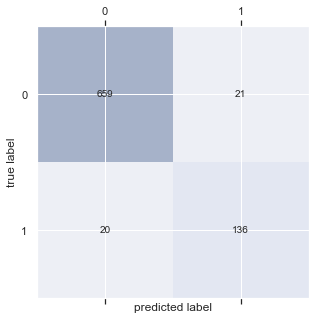

In [701]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(train_pca, train_lbl)
y_pred = rf.predict(test_pca[:])
confmat = confusion_matrix(y_true=test_lbl, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=test_lbl, y_pred=y_pred)
recall = recall_score(y_true=test_lbl, y_pred=y_pred)
f1 = f1_score(y_true=test_lbl, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(test_lbl, y_pred, target_names=["Lost", "Won"]))

# The Machine Learning Classification Models

## Logistic Regression

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = .1)

log_reg.fit(X_train_std, y_train)
log_reg.predict(X_test_std)
log_reg.score(X_test_std, y_test)

0.9342105263157895

## Decision Trees

In [61]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train_std, y_train)
tree.predict(X_test_std)
tree.score(X_test_std, y_test)

0.9413875598086124

## Random Forest

In [427]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, random_state=0)

rf.fit(X_train_std, y_train)
rf.predict(X_test_std)
rf.score(X_test_std, y_test)

0.9545454545454546

## Support Vector Machines

#### Linear SVM

In [63]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear', C= .2)

linear_svm.fit(X_train_std, y_train)
linear_svm.predict(X_test_std)
linear_svm.score(X_test_std, y_test)

0.9354066985645934

#### RBF SVM

In [64]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel = 'rbf', C= .5)

rbf_svm.fit(X_train_std, y_train)
rbf_svm.predict(X_test_std)
rbf_svm.score(X_test_std, y_test)

0.9354066985645934

#### Poly SVM

In [65]:
poly_svm = SVC(kernel = 'poly', C = .5)

poly_svm.fit(X_train_std, y_train)
poly_svm.predict(X_test_std)
poly_svm.score(X_test_std, y_test)

0.9401913875598086

#### Sigmoid SVM

In [66]:
sigmoid_svm = SVC(kernel = 'sigmoid', C = .1)

sigmoid_svm.fit(X_train_std, y_train)
sigmoid_svm.predict(X_test_std)
sigmoid_svm.score(X_test_std, y_test)

0.9210526315789473

## K Nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_std, y_train)
knn.predict(X_test_std)
knn.score(X_test_std, y_test)

0.9389952153110048

### Feature Selection and Feature Engineering

**Random Forest Classifier** can identify the importance of each feature

In [68]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train_std, y_train)


feature_importances = rf.feature_importances_

# feature importances will always sum to 1
print("Feature importances:\n{}".format(feature_importances))

Feature importances:
[0.23859461 0.1876875  0.0600154  0.10586223 0.05810081 0.11350228
 0.07213793 0.08710127 0.03337672 0.04362126]


In [69]:
feature_importances.shape

(10,)

In [70]:
# create a DataFrame to display the best features
# feature_importance array needs to be reshaped; it is a one-imensional array of shape (42,), 
    # it needs to be a two-dimensioanl array of shaped (1,42)
best_features = pd.DataFrame(feature_importances.reshape(1,-1), columns=deal_df.columns[:-1], index = ["importance"])
best_features

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage
importance,0.238595,0.187688,0.060015,0.105862,0.058101,0.113502,0.072138,0.087101,0.033377,0.043621



# Display a list of the 'n' most important features (sorted) based upon a given threshold

In [71]:
from sklearn.feature_selection import SelectFromModel

# threshold: may be set to None (which defaults to mean),'median', number between 0 and 1
# prefit=True tells it to use the model that we've already fit above

sfm= SelectFromModel(rf, threshold=.018, prefit=True)
#sfm = SelectFromModel(rf, threshold='mean', prefit=True)

# Get the indices of the most important features
most_important_features = sfm.get_support(indices=True)
print("Indices of the most important features: ", most_important_features)

# convert columns from an Index object to a numpy array so that we can pass a list/mask to it
features = np.array(deal_df.columns)

best_features = list(features[most_important_features])
num = len(best_features)

# display the best features, given a threshold, not necessarily in order
print("\n" "The {} best features (not necessarily in order): \n{}".format(num, best_features))

Indices of the most important features:  [0 1 2 3 4 5 6 7 8 9]

The 10 best features (not necessarily in order): 
['selected_count', 'create_to_selected', 'create_to_propose', 'create_to_shop', 'create_to_close', 'shop_to_close', 'days_shop_from_qtr_beg', 'days_shop_from_qtr_end', 'days_created_from_qtr_beg', 'cycle_per_stage']


### Cross Validation (for model selection)

In [72]:
# checks against 10 differnt folds of all models --> 9 folds will be trained 1 tested on
from sklearn.model_selection import cross_val_score

classifiers = [log_reg, tree, rf, linear_svm, rbf_svm, poly_svm, sigmoid_svm, knn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [73]:
models_deal_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                         index=["LR", "Tree", "Forest", "Linear-SVM", "RBF-SVM", "Poly-SVM", "Sigmoid-SVM", "KNN"])
models_deal_df["Mean"] = models_deal_df.mean(axis=1)
models_deal_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.943590,0.933333,0.953846,0.923077,0.917949,0.943590,0.897436,0.948718,0.938144,0.948454,0.934814
Tree,0.933333,0.928205,0.943590,0.964103,0.917949,0.917949,0.897436,0.958974,0.938144,0.948454,0.934814
Forest,0.974359,0.953846,0.974359,0.969231,0.912821,0.948718,0.907692,0.958974,0.953608,0.969072,0.952268
Linear-SVM,0.943590,0.933333,0.958974,0.938462,0.907692,0.943590,0.897436,0.943590,0.927835,0.943299,0.933780
RBF-SVM,0.948718,0.938462,0.964103,0.933333,0.902564,0.943590,0.902564,0.948718,0.927835,0.943299,0.935319
Poly-SVM,0.948718,0.938462,0.958974,0.943590,0.902564,0.948718,0.907692,0.943590,0.927835,0.943299,0.936344
Sigmoid-SVM,0.917949,0.912821,0.953846,0.897436,0.897436,0.928205,0.897436,0.933333,0.932990,0.917526,0.918898
KNN,0.943590,0.943590,0.969231,0.938462,0.917949,0.958974,0.902564,0.958974,0.938144,0.948454,0.941993


### Box Plot (for model selection)

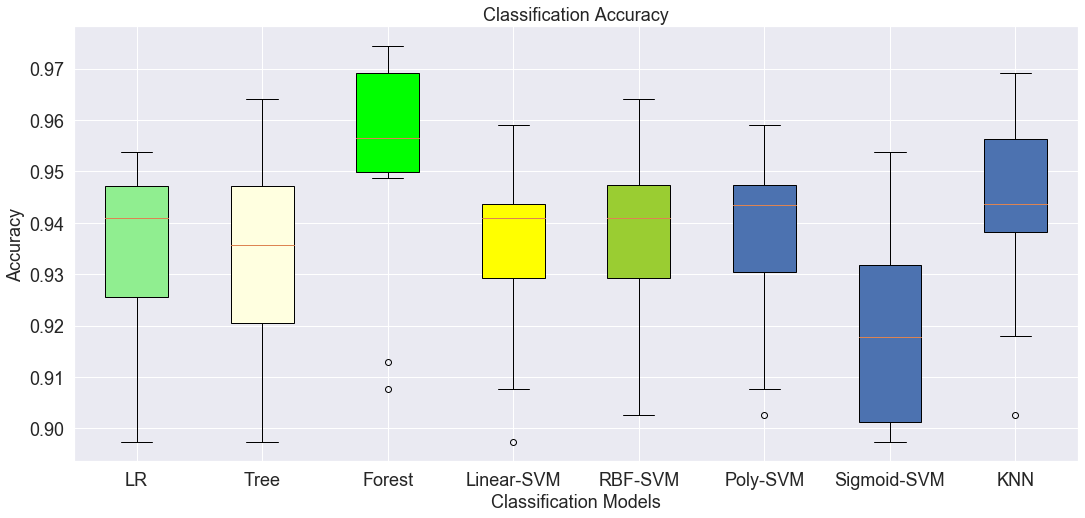

In [74]:
        
# BOXPLOT comparing models and comparing SVM using different feature subsets
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)

axes.set_title('Classification Accuracy', fontsize = 18)


# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=["LR", "Tree", "Forest", "Linear-SVM", "RBF-SVM", "Poly-SVM", "Sigmoid-SVM", "KNN"])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)


### Compare the accuracy of the Training set versus the Test set using different models

interpret box plot of models. Once select models run below to compare train/test scores

In [75]:
log_reg = LogisticRegression(C = 1)
log_reg.fit(X_train_std, y_train)
train_score = log_reg.score(X_train_std, y_train)
test_score = log_reg.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9425051334702259 
Test score: 0.9425837320574163


In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
tree.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9425051334702259 
Test score: 0.9425837320574163


In [77]:
rf = RandomForestClassifier(n_estimators=250, random_state=0)
rf.fit(X_train_std, y_train)
train_score = rf.score(X_train_std, y_train)
test_score = rf.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.9545454545454546


In [78]:
linear_svm = SVC(kernel='linear', C=.6)
linear_svm.fit(X_train_std, y_train)
train_score = linear_svm.score(X_train_std, y_train)
test_score = linear_svm.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.938911704312115 
Test score: 0.9354066985645934


In [79]:
rbf_svm = SVC(kernel='rbf', C=1)
rbf_svm.fit(X_train_std, y_train)
train_score = rbf_svm.score(X_train_std, y_train)
test_score = rbf_svm.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9471252566735113 
Test score: 0.9366028708133971


In [80]:
poly_svm = SVC(kernel='poly', C=1)
poly_svm.fit(X_train_std, y_train)
train_score = poly_svm.score(X_train_std, y_train)
test_score = poly_svm.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9450718685831622 
Test score: 0.9401913875598086


In [81]:
sigmoid_svm = SVC(kernel='sigmoid', C=1)
sigmoid_svm.fit(X_train_std, y_train)
train_score = sigmoid_svm.score(X_train_std, y_train)
test_score = sigmoid_svm.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9055441478439425 
Test score: 0.9066985645933014


In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
train_score = knn.score(X_train_std, y_train)
test_score = knn.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9568788501026694 
Test score: 0.9401913875598086


### Grid Search


In [83]:
# Grid Search --> select features you want to fine tune and tweak
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_range = [1, 10, 25, 50, 100, 200, 300]
classifiers = [
               {"clf":LogisticRegression(random_state=0), "param_grid":[{'C': param_range}]}, 
               {"clf":KNeighborsClassifier(n_neighbors=5), "param_grid":[{'n_neighbors': param_range}]},
               #{"clf": MLPClassifier(), "param_grid":[{'C': param_range}]},
               {"clf":SVC(random_state=0), "param_grid":[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}]}, 
               {"clf":RandomForestClassifier(random_state=0), "param_grid":[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [250, 500, 1000, 1500, 2000]}]}
              ]
# Grid Search (Logistic Regression) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=log_reg, param_grid=[{'C': param_range}], scoring='accuracy', cv=3)
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9455852156057495 
Test score: 0.9461722488038278


In [84]:
# Grid Search (Support Vector Machine) comparing Test with Training set accuracy

gs = GridSearchCV(estimator=linear_svm, param_grid=[{'C': param_range, 'gamma': param_range, 'kernel': ['linear','rbf']}], scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9425051334702259 
Test score: 0.937799043062201


In [85]:
# Grid Search (Random Forest) comparing Test with Training set accuracy
# Grid Search --> select features you want to fine tune and tweak
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'max_features': [None, 'auto'],'n_estimators': [250,500,1000, 1500, 2000]}], scoring='recall', cv=5, n_jobs=-1)
gs.fit(X_train_std, y_train)
train_score = gs.score(X_train_std, y_train)
test_score = gs.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 1.0 
Test score: 0.8734177215189873


              precision    recall  f1-score   support

        Lost       0.97      0.97      0.97       678
         Won       0.88      0.87      0.88       158

    accuracy                           0.95       836
   macro avg       0.93      0.92      0.93       836
weighted avg       0.95      0.95      0.95       836



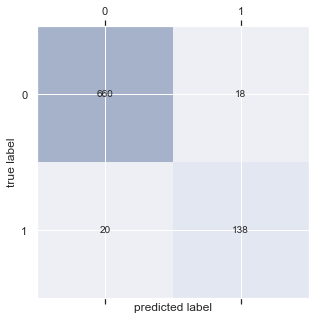

In [86]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

gs.fit(X_train_std, y_train)
y_pred = gs.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [87]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('Grid Search Random Forest Model AUC: {}%'.format(auc))

Grid Search Random Forest Model AUC: 92.34%


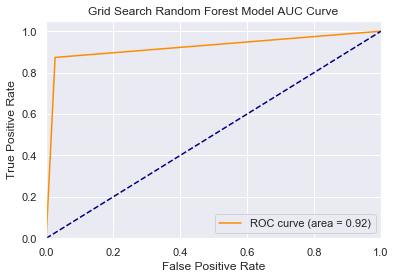

In [88]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Grid Search Random Forest Model AUC Curve')
plt.legend(loc="lower right")

# Predictive Model Summary

## Logistic Regression


              precision    recall  f1-score   support

        Lost       0.96      0.97      0.96       678
         Won       0.88      0.80      0.84       158

    accuracy                           0.94       836
   macro avg       0.92      0.89      0.90       836
weighted avg       0.94      0.94      0.94       836



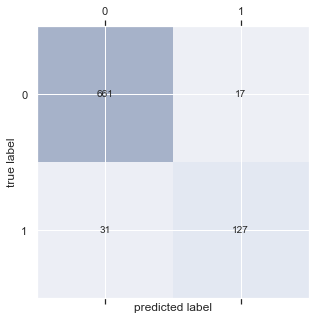

In [89]:
# Logistic Regression Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg = LogisticRegression(C = 1)
log_reg.fit(X_train_std, y_train)
y_pred = log_reg.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

In [90]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('Logistic Model AUC: {}%'.format(auc))

Logistic Model AUC: 88.94%


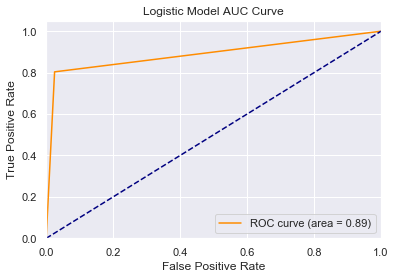

In [91]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Model AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

              precision    recall  f1-score   support

        Lost       0.95      0.89      0.92       678
         Won       0.64      0.81      0.72       158

    accuracy                           0.88       836
   macro avg       0.80      0.85      0.82       836
weighted avg       0.89      0.88      0.88       836



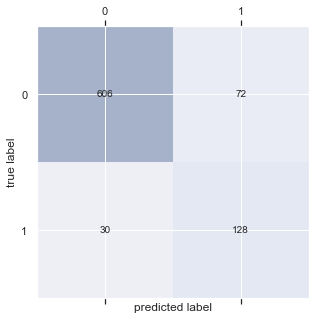

In [92]:
# Decision Tree Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))


In [93]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('DecisionTree Model AUC: {}%'.format(auc))

DecisionTree Model AUC: 85.20%


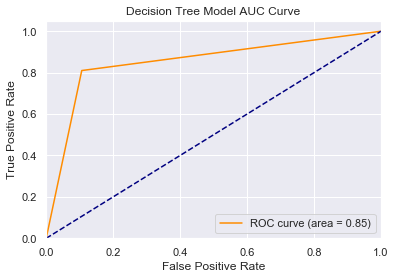

In [94]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Model AUC Curve')
plt.legend(loc="lower right")
plt.show()


### Linear SVM

              precision    recall  f1-score   support

        Lost       0.94      0.98      0.96       678
         Won       0.89      0.75      0.81       158

    accuracy                           0.94       836
   macro avg       0.92      0.86      0.89       836
weighted avg       0.93      0.94      0.93       836



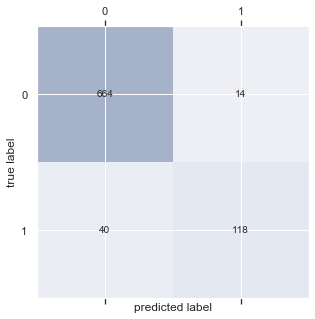

In [95]:
# Linear Support Vector Machines Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

linear_svm = SVC(kernel = 'linear', C = .6)


linear_svm.fit(X_train_std, y_train)
y_pred = linear_svm.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [96]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('Linear SVM Model AUC: {}%'.format(auc))

Linear SVM Model AUC: 86.31%


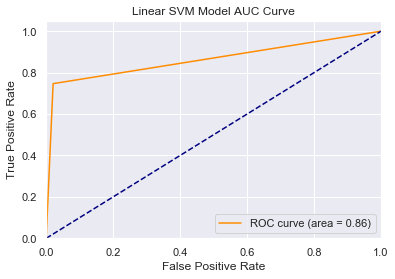

In [97]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear SVM Model AUC Curve')
plt.legend(loc="lower right")
plt.show()

## RBF SVM

              precision    recall  f1-score   support

        Lost       0.95      0.97      0.96       678
         Won       0.87      0.78      0.82       158

    accuracy                           0.94       836
   macro avg       0.91      0.88      0.89       836
weighted avg       0.94      0.94      0.94       836



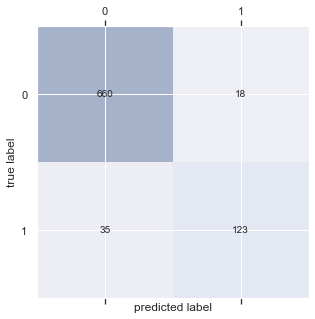

In [98]:
# RBF Support Vector Machines Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rbf_svm = SVC(kernel='rbf', C=1)
rbf_svm.fit(X_train_std, y_train)
y_pred = rbf_svm.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [99]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('RBF SVM Model AUC: {}%'.format(auc))

RBF SVM Model AUC: 87.60%


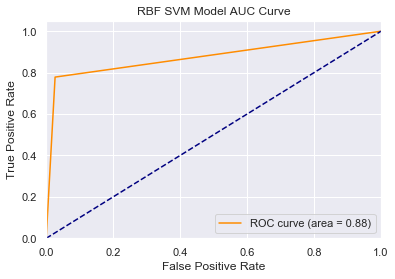

In [100]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RBF SVM Model AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

              precision    recall  f1-score   support

        Lost       0.93      0.96      0.95       678
         Won       0.81      0.71      0.76       158

    accuracy                           0.91       836
   macro avg       0.87      0.84      0.85       836
weighted avg       0.91      0.91      0.91       836



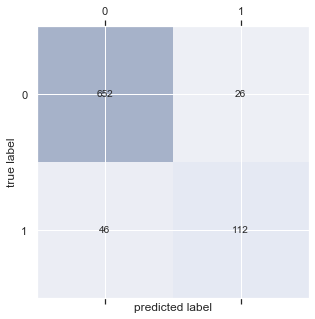

In [101]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [102]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('Random Forest Model AUC: {}%'.format(auc))

Random Forest Model AUC: 83.53%


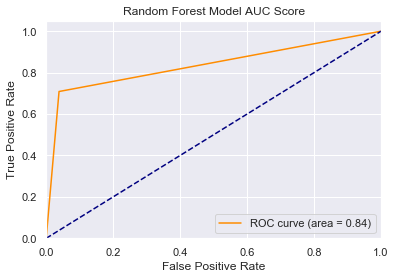

In [103]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model AUC Score')
plt.legend(loc="lower right")
plt.show()

### Grid Search Random Forest

              precision    recall  f1-score   support

        Lost       0.87      0.98      0.92       678
         Won       0.79      0.39      0.53       158

    accuracy                           0.87       836
   macro avg       0.83      0.68      0.72       836
weighted avg       0.86      0.87      0.85       836



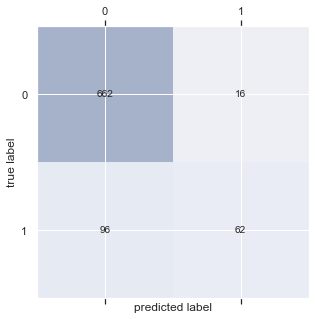

In [104]:
# Grid Search (Random Forest) comparing Test with Training set accuracy


# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
                                                                             'max_features': [None, 'auto'],
                                                                            'n_estimators': [1000, 1500, 2000]}], scoring='accuracy', cv=3, n_jobs=-1)
gs.fit(X_train_std, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [105]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('Grid Search Random Forest Model AUC: {}%'.format(auc))

Grid Search Random Forest Model AUC: 68.44%


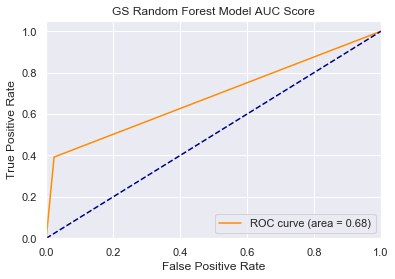

In [106]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GS Random Forest Model AUC Score')
plt.legend(loc="lower right")
plt.show()

## KNN

              precision    recall  f1-score   support

        Lost       0.97      0.96      0.96       678
         Won       0.82      0.87      0.85       158

    accuracy                           0.94       836
   macro avg       0.90      0.91      0.90       836
weighted avg       0.94      0.94      0.94       836



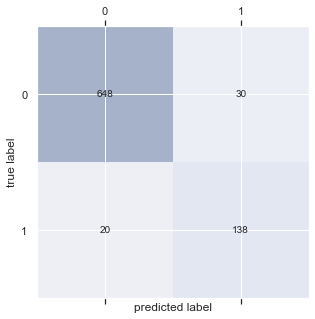

In [107]:
# K-Nearest Neighbor Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Lost", "Won"]))

In [108]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = y_test
y_scores = y_pred
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('KNN Model AUC: {}%'.format(auc))

KNN Model AUC: 91.46%


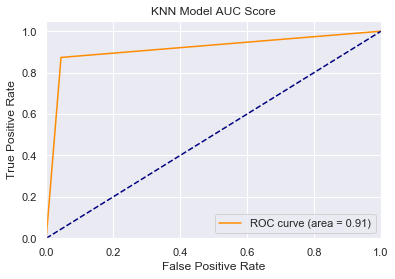

In [109]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Model AUC Score')
plt.legend(loc="lower right")
plt.show()

# Retrain model on entire training dataset without splitting to train/test

In [702]:
deal_df.head()
deal_df.describe()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,0.149066,44.447198,35.978807,83.532687,401.636494,86.168463,20.972701,16.245690,51.429598,192.887213,0.188578
std,0.356218,163.805909,151.364649,220.914350,381.932898,218.042554,29.824266,25.310689,25.193653,268.643363,0.391243
min,0.000000,0.000000,0.000000,-764.000000,-530.000000,-365.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,288.000000,0.000000,0.000000,0.000000,59.000000,87.000000,0.000000
75%,0.000000,0.000000,0.000000,27.000000,564.250000,58.250000,43.000000,25.000000,72.000000,285.000000,0.000000
max,1.000000,1779.000000,2220.000000,2100.000000,3505.000000,1848.000000,91.000000,91.000000,91.000000,2655.000000,1.000000


In [703]:
# Reassign the final variables 
##X = deal_df[['acv_usd', 'ln_acv_usd', 'stage_duration', 'forward_stage_change_count', 'backward_stage_change_count', 'total_stage_change_count', 'days_to_close', 'days_to_first_shopping', 'days_to_last_shopping', 'days_to_close_after_shopping', 'shopping_pause', 'days_in_shopping', 'in_shopping', 'odd_even_quarter_closedate','odd_even_quarter_first_shoppingdate_Odd','odd_even_quarter_first_shoppingdate_Even', 'odd_even_quarter_first_shoppingdate_Never', 'odd_even_quarter_last_shoppingdate_Never', 'odd_even_quarter_last_shoppingdate_Even', 'odd_even_quarter_last_shoppingdate_Odd', 'prior_stage_to_close_Target', 'prior_stage_to_close_Evaluation of Options','prior_stage_to_close_Pre-Shopping','prior_stage_to_close_Obtain Contract','prior_stage_to_close_Management Approval','prior_stage_to_close_Resolution of Concerns','prior_stage_to_close_Pushed']].values
#X = funnel_data[['forward_stage_change_count', 'days_to_close_after_shopping', 'days_in_shopping', 'prior_stage_to_close_Management Approval', 'prior_stage_to_close_Obtain Contract', 'prior_stage_to_close_Target']].values
#X = funnel_data[['days_to_close_after_shopping','forward_stage_change_count', 'days_to_close_after_shopping', 'days_in_shopping', 'prior_stage_to_close_Obtain Contract','stage_duration','days_to_close', 'days_to_first_shopping','ln_acv_usd' ]].values
#X = funnel_data[['days_to_close_after_shopping','forward_stage_change_count', 'days_to_close_after_shopping', 'days_in_shopping', 'prior_stage_to_close_Obtain Contract','stage_duration','days_to_close', 'days_to_first_shopping','ln_acv_usd' ]].values
##y = dc_df['simple_stage'].values
X = deal_df.iloc[:, :-1].values
y = deal_df.iloc[:, -1].values


In [704]:
# standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

# train data calcualtes mean/std and then standarizes it using 'fit'
# test just calculates mean/std for test data. 
# DO NOT 'standarize' test data. Only need to standarize train to train model
X_train_std = stdsc.fit_transform(X)

In [705]:
X_train_std[:-1]

array([[ 2.38923288,  0.90094008,  0.71377696, ...,  0.0693235 ,
         0.49904079, -0.50964149],
       [ 2.38923288,  2.76934014,  1.2556124 , ...,  0.78061326,
        -0.21555322, -0.34954922],
       [-0.41854438, -0.27138937, -0.23773894, ..., -0.64196626,
        -2.04173791,  0.30571214],
       ...,
       [-0.41854438, -0.27138937, -0.23773894, ..., -0.64196626,
         0.81663813, -0.71813374],
       [ 2.38923288,  1.05358714,  1.09041866, ...,  0.78061326,
        -0.53315056, -0.50964149],
       [-0.41854438, -0.27138937, -0.23773894, ..., -0.64196626,
        -1.92263891,  0.17168141]])

In [706]:
X[:-1]

array([[  1, 192, 144, ...,  18,  64,  56],
       [  1, 498, 226, ...,  36,  46,  99],
       [  0,   0,   0, ...,   0,   0, 275],
       ...,
       [  0,   0,   0, ...,   0,  72,   0],
       [  1, 217, 201, ...,  36,  38,  56],
       [  0,   0,   0, ...,   0,   3, 239]])

In [707]:
y

array([1, 0, 0, ..., 1, 0, 1])

In [708]:
X.shape

(2784, 10)

In [709]:
y.shape

(2784,)

In [710]:
X_full_train = X_train_std
y_full_train = y

In [119]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)

In [120]:
logreg.fit(X_full_train, y_full_train)
full_train_score_logreg = logreg.score(X_full_train, y_full_train)
print("Full Train score_logreg: {}".format(full_train_score_logreg))

Full Train score_logreg: 0.9475574712643678


In [121]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_full_train, y_full_train)
full_train_score_tree = tree.score(X_full_train, y_full_train)
print("Full Train score_tree: {}".format(full_train_score_tree))

Full Train score_tree: 1.0


In [437]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_full_train, y_full_train)
full_train_score_rf = rf.score(X_full_train, y_full_train)
print("Full Train score_rf: {}".format(full_train_score_rf))

Full Train score_rf: 1.0


In [123]:
#KNN
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_full_train, y_full_train)
full_train_score = knn.score(X_full_train, y_full_train)
print("Full Train score: {}".format(full_train_score))

Full Train score: 0.9608477011494253


In [124]:
# SVM
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_full_train, y_full_train)
full_train_score_svm = rbf_svm.score(X_full_train, y_full_train)
print("Full Train score: {}".format(full_train_score_svm))

Full Train score: 0.9493534482758621


### PCA Random Forest

### Standardize using PCA

In [711]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline

In [722]:

data_scaled = pd.DataFrame(preprocessing.scale(deal_df.iloc[:, :-1]),columns = deal_df.iloc[:, :-1].columns) 

# PCA
pca.fit(data_scaled)
x_pca = pca.transform(data_scaled)

# assign target to 

full_train_target = deal_df['exp_outcome']
target_name = 'exp_outcome'

#data = deal_df.iloc[:, :-1].values

In [723]:
# load classifiers and initiate PCA
pca = PCA(n_components = 7)
#pca = PCA(0.90)
classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)


In [724]:
x_pca.shape, full_train_target.shape

((2784, 7), (2784,))

In [721]:

# transform/fit
X_transformed_pca = pca.fit_transform(data)
classifier.fit(X_transformed_pca, full_train_target)
#X_transformed_pca = x_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [726]:
# Full Training PCA RF Scoring Model
full_train_score_pca_rf = rf.score(X_transformed_pca, full_train_target)
print("Full Train score_pca_rf: {}".format(full_train_score_pca_rf))

Full Train score_pca_rf: 0.8114224137931034


In [ ]:
DELETE BELOW DONT RUN

In [ ]:
#fit PCA, transform data and fit to random forest classifier
# on the transformed data

pipe = Pipeline([('pca', PCA(n_components = 5)),
                 ('rf', RandomForestClassifier(n_estimators = 1000, random_state = 0,)])
                 
                 
pipe.fit()

In [282]:


feature_names = deal_df.iloc[:,:-1].columns

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

#n_components = 5
#pca = PCA(n_components)
pca = PCA(0.90)
pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [283]:
x_pca = pca.transform(scaled_data)

SyntaxError: invalid syntax (<ipython-input-295-5dee82518636>, line 1)

In [289]:
target.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [297]:
y_pca = pca.transform(target)

ValueError: Expected 2D array, got 1D array instead:
array=[1 0 0 ... 1 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [273]:
x_pca.shape, target.shape

((2784, 7), (2784,))

In [253]:
# Fit on full training set only.

pca_X = scaler.fit(x_pca)


In [257]:
x_pca.shape

(2784, 7)

In [254]:
#from sklearn.decomposition import PCA
# Make an instance of the Model n_components or et PCA(.95)
#pca = n_components = 2
#pca = PCA(0.90)

In [277]:
pca.fit(x_pca, target)
full_train_score_pca_rf = rf.score(x_pca, target)
print("Full Train score_pca_rf: {}".format(full_train_score_pca_rf))

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [55]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf.fit(train_pca, train_lbl)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
rf.predict(test_pca[:])

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

### New Test data (unseen and untested)

In [561]:
# open shopping funnel dataset

deal_df_test = pd.read_excel("test_new_vars_q4_fy20.xlsx")

In [562]:
deal_df_test.head()

,sfdc_opportunity_id,created_date,close_date,simple_stage,big_deal_flag,shopping_date,created_beg_of_qtr,created_end_of_qtr,shop_beg_of_qtr,shop_end_of_qtr,closed_beg_of_qtr,closed_end_of_qtr,product_count,campaign_influence_count,total_opp_roles,exec_sponsor,champion,decision_maker,economic_decision_maker,econ_buyer,influencer,technical_buyer,subject_matter_expert,evaluator,business_user,detractor,exec_sponsor_flag,champion_flag,decision_maker_flag,economic_decision_maker_flag,econ_buyer_flag,influencer_flag,technical_buyer_flag,subject_matter_expert_flag,evaluator_flag,business_user_flag,detractor_flag,closedate_push_count,prefunnel_date,qualify_date,verify_date,position_date,propose_date,selected_date,days_created_from_qtr_beg,days_created_from_qtr_end,days_shop_from_qtr_beg,days_shop_from_qtr_end,create_to_shop,shop_to_close,create_to_prefunnel,create_to_qualify,create_to_verify,create_to_position,create_to_propose,create_to_selected,create_to_close,prefunnel_to_qualify,prefunnel_to_verify,prefunnel_to_position,prefunnel_to_propose,prefunnel_to_selected,prefunnel_to_close,qualify_to_verify,qualify_to_position,qualify_to_propose,qualify_to_selected,qualify_to_close,verify_to_position,verify_to_propose,verify_to_selected,verify_to_close,position_to_propose,position_to_selected,position_to_close,propose_to_selected,propose_to_close,selected_to_close,prefunnel_count,qualify_count,position_count,verify_count,propose_count,selected_count,total_stage_count,cycle_per_stage,forward_total_count,backward_total_count,nochange_total_count,exp_outcome
0,0065000000gJ8Id,2017-06-29,2020-08-19,Lost,0,NaT,2017-04-01,2017-06-30,NaT,NaT,2020-07-01,2020-09-30,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,7.0,2017-10-30,2017-09-11,NaT,NaT,NaT,NaT,89,1,0,0,0,0,123,74,0,0,0,0,1147,-49,0,0,0,0,1024,0,0,0,0,1073,0,0,0,0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,2,573,3,3,3,0
1,0062J00000nbEzl,2019-06-12,2020-08-31,Lost,0,2019-06-12,2019-04-01,2019-06-30,2019-04-01,2019-06-30,2020-07-01,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,2.0,2019-09-18,2019-09-17,NaT,NaT,NaT,NaT,72,18,72,18,0,446,98,97,0,0,0,0,446,-1,0,0,0,0,348,0,0,0,0,349,0,0,0,0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,2,223,3,3,3,0
2,0062J00000leuso,2019-02-07,2020-09-25,Lost,0,NaT,2019-01-01,2019-03-31,NaT,NaT,2020-07-01,2020-09-30,1.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,4.0,NaT,NaT,2019-05-03,NaT,NaT,NaT,37,52,0,0,0,0,0,0,85,0,0,0,596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,596,2,2,2,0
3,0065000000Wk6n6,2015-05-03,2020-09-30,Lost,0,NaT,2015-04-01,2015-06-30,NaT,NaT,2020-07-01,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,12.0,2017-04-26,2017-03-25,NaT,NaT,NaT,NaT,32,58,0,0,0,0,724,692,0,0,0,0,1977,-32,0,0,0,0,1253,0,0,0,0,1285,0,0,0,0,0.0,0.0,0.0,0,0,0,1,1,0,0,0,0,2,988,3,3,3,0
4,0062J00000ndOu1,2019-10-31,2020-07-10,Lost,0,2019-12-26,2019-10-01,2019-12-31,2019-10-01,2019-12-31,2020-07-01,2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,2.0,NaT,NaT,NaT,NaT,2019-12-27,NaT,30,61,86,5,56,197,0,0,0,0,57,0,253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,196,0,0,0,0,0,1,0,1,253,2,2,2,0


### Transform New Test Data

#### Dropping ID and Date fields

In [563]:
# Assign Top 25 predictive features
#deal_df_test = deal_df_test[['selected_count','create_to_selected','shop_to_close', 'create_to_shop','selected_to_close', 'days_shop_from_qtr_end', 'days_shop_from_qtr_beg', 'qualify_to_selected', 'create_to_close', 'propose_to_close','propose_count', 'create_to_propose', 'propose_to_selected', 'cycle_per_stage','campaign_influence_count', 'product_count', 'closedate_push_count', 'forward_total_count', 'nochange_total_count','backward_total_count', 'total_opp_roles', 'econ_buyer', 'econ_buyer_flag', 'champion', 'influencer', 'exp_outcome']]

# Original Top 10 variables
deal_df_test = deal_df_test[['selected_count','create_to_selected','create_to_propose','create_to_shop','create_to_close','shop_to_close', 'days_shop_from_qtr_beg','days_shop_from_qtr_end','days_created_from_qtr_beg','cycle_per_stage', 'exp_outcome']]

# Hybrid Top 18 variables
deal_df_test = deal_df_test[['selected_count','create_to_selected', 'shop_to_close', 'create_to_shop','selected_to_close', 'days_shop_from_qtr_end', 'days_shop_from_qtr_beg', 'days_created_from_qtr_beg', 'qualify_to_selected', 'create_to_close', 'propose_to_close','propose_count', 'create_to_propose', 'propose_to_selected', 'cycle_per_stage','campaign_influence_count', 'product_count', 'closedate_push_count', 'exp_outcome']]


In [564]:
# replace all NANs with 0
deal_df_test = deal_df_test.fillna(0)

In [565]:
deal_df_test.describe()

,selected_count,create_to_selected,create_to_propose,create_to_shop,create_to_close,shop_to_close,days_shop_from_qtr_beg,days_shop_from_qtr_end,days_created_from_qtr_beg,cycle_per_stage,exp_outcome
count,211.000000,211.000000,211.000000,211.000000,211.00000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.165877,31.701422,35.625592,61.123223,434.43128,75.440758,19.739336,22.364929,50.663507,225.715640,0.241706
std,0.372855,110.775410,139.800188,165.961281,359.29049,140.696973,27.247950,29.566785,24.943852,271.321606,0.429135
min,0.000000,0.000000,0.000000,-1.000000,-1.00000,-73.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,171.50000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,409.00000,0.000000,0.000000,0.000000,56.000000,135.000000,0.000000
75%,0.000000,0.000000,0.000000,31.500000,503.00000,82.000000,39.000000,44.000000,72.000000,385.000000,0.000000
max,1.000000,1016.000000,1319.000000,1534.000000,1977.00000,858.000000,89.000000,91.000000,90.000000,1587.000000,1.000000


## Archive Finalized Test Dataset

In [180]:
# saves cleaned and transformed data set prior to modeling
deal_df_test.to_csv("deal_df_test_cleaned_trasnormed_final.csv")

## Split new test dataset between features and target

In [566]:
# Get X and y

# list individual features want to use to X and Y

#X_final_test = deal_df_test.iloc[:, :].values
X_final_test = deal_df_test.iloc[:, :-1].values
y_final_test = deal_df_test.iloc[:, -1].values

In [567]:
X_final_test.shape

(211, 10)

In [568]:
y_final_test[:-1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [569]:
y_final_test.shape

(211,)

### Logistic Model

In [759]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 1)

In [760]:
logreg.fit(X_full_train, y_full_train)

full_train_score = logreg.score(X_full_train, y_full_train)

test_predict_logreg = logreg.predict(X_final_test)

#test_predict_logreg_prob = logreg.predict_proba(X_final_test)
print("Train score: {}\nPredicted Status: {}".format(train_score, test_predict_logreg))

Train score: 0.9821580288870009
Predicted Status: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


              precision    recall  f1-score   support

        Lost       1.00      1.00      1.00       433
         Won       0.95      1.00      0.97        19

    accuracy                           1.00       452
   macro avg       0.97      1.00      0.99       452
weighted avg       1.00      1.00      1.00       452



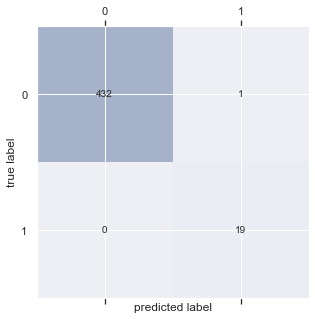

In [761]:
# Logistic Regression Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg.fit(X_full_train, y_full_train)
y_pred = log_reg.predict(X_final_test_std)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

### Decision Tree Model

In [762]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_full_train, y_full_train)
full_train_score_tree = tree.score(X_full_train, y_full_train)
test_predict_tree = tree.predict(X_final_test)
print("Train score: {}\nPredicted Status: {}".format(train_score, test_predict_tree))

Train score: 0.9821580288870009
Predicted Status: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


              precision    recall  f1-score   support

        Lost       1.00      0.99      1.00       433
         Won       0.86      0.95      0.90        19

    accuracy                           0.99       452
   macro avg       0.93      0.97      0.95       452
weighted avg       0.99      0.99      0.99       452



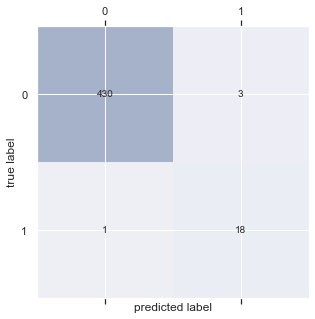

In [763]:
# Decision Tree Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree.fit(X_full_train, y_full_train)
y_pred = tree.predict(X_final_test)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

#### Decision Tree Map

### Random Forest Model 

In [456]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state =0)

In [458]:
rf.fit(X_full_train, y_full_train)
full_train_score = rf.score(X_full_train, y_full_train)
test_predict_rf = rf.predict(X_final_test)
test_prob_rf = rf.predict_proba(X_final_test)
print("Train score: {}\nPredicted Stage Status: {}".format(full_train_score, test_predict_rf))

Train score: 1.0
Predicted Stage Status: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


              precision    recall  f1-score   support

        Lost       0.83      0.97      0.89       160
         Won       0.79      0.37      0.51        51

    accuracy                           0.82       211
   macro avg       0.81      0.67      0.70       211
weighted avg       0.82      0.82      0.80       211



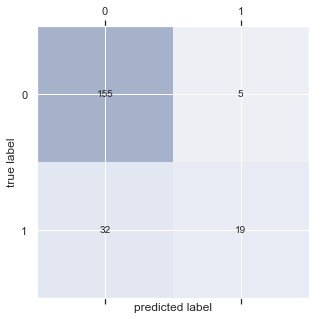

In [460]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(X_full_train, y_full_train)
y_pred = rf.predict(X_final_test)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

In [768]:
# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_full_train, y_full_train)
full_train_score = knn.score(X_full_train, y_full_train)
test_predict_knn = knn.predict(X_final_test)
print("Train score: {}\nPredicted Status: {}".format(train_score, test_predict_knn))

Train score: 0.9821580288870009
Predicted Status: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [770]:
# SVM
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')

rbf_svm.fit(X_full_train, y_full_train)
full_train_score_svm = rbf_svm.score(X_full_train, y_full_train)
test_predict_svm_rbf = rbf_svm.predict(X_final_test)
print("Liear SVM Train score: {}\nPredicted Status: {}".format(full_train_score_svm, test_predict_svm))

Liear SVM Train score: 0.9221165279429251
Predicted Status: [0 1 0 ... 0 0 0]


### Grid Search Random Forest Model

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


gs = GridSearchCV(estimator=rf, param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'max_features': [None, 'auto'],'n_estimators': [250,500,1000, 1500, 2000]}], scoring='accuracy', cv=5, n_jobs=-1)

gs.fit(X_full_train, y_full_train)
train_score = gs.score(X_full_train, y_full_train)
test_score = gs.score(X_final_test_std, y_final_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.9578284052350945 
Test score: 0.9710743801652892


              precision    recall  f1-score   support

        Lost       0.99      0.98      0.98       454
         Won       0.74      0.83      0.78        30

    accuracy                           0.97       484
   macro avg       0.86      0.91      0.88       484
weighted avg       0.97      0.97      0.97       484



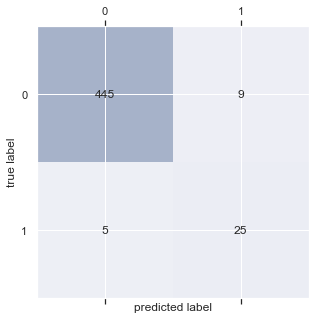

In [151]:
# Grid Search (Random Forest) comparing Test with Training set accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


final_gs_rf = gs.fit(X_full_train, y_full_train)

y_pred = gs.predict(X_final_test_std)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))

#### Random Forest Predict with PCA

#### Transform New Test Data for PCA only. DO NOT REFIT PCA. Transform New Test Data ONLY using alreayd fitted PCA

In [729]:
pca_test_data = X_final_test

In [730]:
pca.fit(pca_test_data)
pca_test_transformed = pca.transform(pca_test_data)


In [731]:
pca_pred_labels = classifier.predict(pca_test_transformed)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [732]:
pca_test_transformed.shape, pca_pred_labels.shape

((211, 7), (211,))

In [733]:
# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0)

In [742]:
from sklearn.ensemble import RandomForestClassifier

pca_rf = classifier.fit(X_transformed_pca, full_train_target)


In [741]:
#rf = RandomForestClassifier(n_estimators=1000, random_state=0)
#rf.fit(X_transformed_pca, full_train_target)
train_score = rf.score(X_transformed_pca, full_train_target)
test_score = rf.score(pca_test_transformed, y_final_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

full_train_score_pca_rf = rf.score(X_transformed_pca, full_train_target)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [594]:
X_transformed_pca.shape, full_train_target.shape, 

((2784, 2), (2784,), (211, 2))

## Random Forest PCA Confusion Matrix

In [602]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

final_pca_rf =  rf.fit(X_transformed_pca, full_train_target)
y_pred = rf.predict(X_final_test[:])
confmat = confusion_matrix(y_true= y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 10 

In [599]:
rf.fit(X_full_train, y_full_train)
full_train_score = rf.score(X_full_train, y_full_train)
#test_predict_rf = rf.predict(X_final_test_std)
test_prob_rf = rf.predict_proba(X_final_test)
print("Train score: {}\nPredicted Stage Status: {}".format(full_train_score, test_prob_rf))

Train score: 1.0
Predicted Stage Status: [[0.64  0.36 ]
 [0.83  0.17 ]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.602 0.398]
 [0.639 0.361]
 [0.64  0.36 ]
 [0.866 0.134]
 [0.602 0.398]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.643 0.357]
 [0.83  0.17 ]
 [0.64  0.36 ]
 [0.613 0.387]
 [0.424 0.576]
 [0.834 0.166]
 [0.639 0.361]
 [0.64  0.36 ]
 [0.745 0.255]
 [0.834 0.166]
 [0.639 0.361]
 [0.613 0.387]
 [0.424 0.576]
 [0.521 0.479]
 [0.639 0.361]
 [0.639 0.361]
 [0.602 0.398]
 [0.64  0.36 ]
 [0.745 0.255]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.745 0.255]
 [0.834 0.166]
 [0.639 0.361]
 [0.639 0.361]
 [0.601 0.399]
 [0.639 0.361]
 [0.424 0.576]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.602 0.398]
 [0.424 0.576]
 [0.578 0.422]
 [0.612 0.388]
 [0.64  0.36 ]
 [0.424 0.576]
 [0.64  0.36 ]
 [0.639 0.361]
 [0.745 0.255]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.639 0.361]
 [0.639 0.361]
 [0.64  0.36 ]
 [0.64  0.36 ]
 [0.521 0.479]
 [0.424 0.576]
 [0.64  0.36 ]
 [0.834 0.166]

              precision    recall  f1-score   support

        Lost       0.83      0.97      0.89       160
         Won       0.79      0.37      0.51        51

    accuracy                           0.82       211
   macro avg       0.81      0.67      0.70       211
weighted avg       0.82      0.82      0.80       211



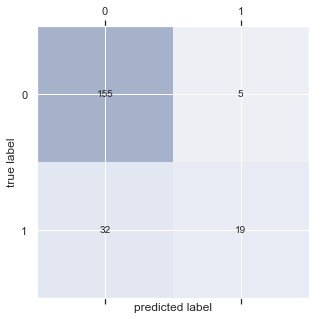

In [601]:
# Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rf.fit(X_full_train, y_full_train)
y_pred = rf.predict(X_final_test)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

              precision    recall  f1-score   support

        Lost       0.98      1.00      0.99       433
         Won       1.00      0.63      0.77        19

    accuracy                           0.98       452
   macro avg       0.99      0.82      0.88       452
weighted avg       0.98      0.98      0.98       452



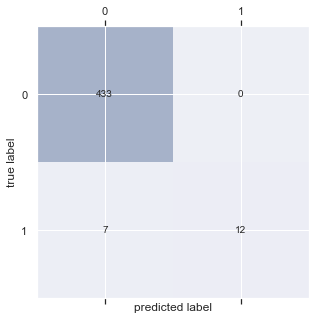

In [771]:
# RBF SVM Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

rbf_svm.fit(X_full_train, y_full_train)
y_pred = rbf_svm.predict(X_final_test)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

              precision    recall  f1-score   support

        Lost       1.00      1.00      1.00       433
         Won       0.90      1.00      0.95        19

    accuracy                           1.00       452
   macro avg       0.95      1.00      0.97       452
weighted avg       1.00      1.00      1.00       452



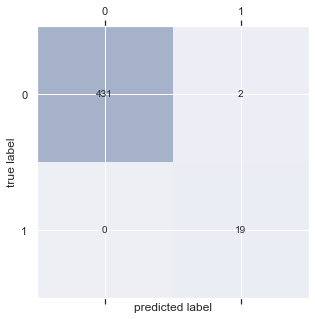

In [769]:
# KNN Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn.fit(X_full_train, y_full_train)
y_pred = knn.predict(X_final_test)
confmat = confusion_matrix(y_true=y_final_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_final_test, y_pred=y_pred)
recall = recall_score(y_true=y_final_test, y_pred=y_pred)
f1 = f1_score(y_true=y_final_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_final_test, y_pred, target_names=["Lost", "Won"]))
# recall  --> of the ones found won or lost how many identify got right

In [152]:
import numpy as np
from sklearn.metrics import roc_auc_score

y_true = pca_test_transformed 
y_scores = pca_pred_labels
auc = format(roc_auc_score(y_true, y_scores)*100, '.2f')

print('KNN Model AUC: {}%'.format(auc))

pca_test_transformed  pca_pred_labels

KNN Model AUC: 90.68%


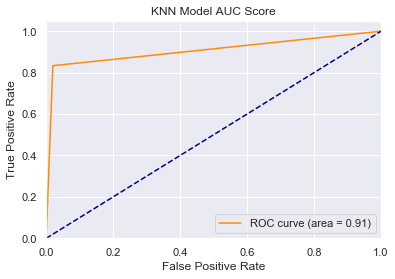

In [153]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Model AUC Score')
plt.legend(loc="lower right")
plt.show()

In [31]:
#deal_df_test['predict_exp_outcome_logreg'] = test_predict_logreg
#deal_df_test['predict_exp_outcome_tree'] = test_predict_tree
deal_df_test['predict_exp_outcome_rf'] = test_prob_rf
#deal_df_test['predict_exp_outcome_knn'] = test_predict_knn
#deal_df_test['predict_exp_outcome_svm_rbf'] = test_predict_svm_rbf
deal_df_test.head()

ValueError: Wrong number of items passed 2, placement implies 1

# Archive final predict output

In [773]:
# saves cleaned and transformed data set prior to modeling
deal_df_test.to_csv("deal_df_test_predicted_q3_FY20.csv")